# Figure 1: Training Loss vs Network Depth

Reproduction of Figure 1 from "The Low-Rank Simplicity Bias in Deep Networks" by Huh et al.

This figure shows that deeper networks struggle to fit high-rank linear functions.

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load results
with open("figure1_results.json", "r") as f:
    results = json.load(f)

print(f"Loaded results from experiment")
print(f"Depths: {results['depths']}")
print(f"Ranks: {results['ranks']}")
print(f"Total time: {results['total_time_seconds'] / 60:.1f} minutes")

Loaded results from experiment
Depths: [2, 4, 8, 16, 32, 48, 64]
Ranks: [1, 4, 16, 32, 64]
Total time: 70.8 minutes


In [2]:
# Extract data
depths = results["depths"]
ranks = results["ranks"]
losses = results["losses"]

# Compute means and stds for each (rank, depth) combination
loss_means = {}
loss_stds = {}

for rank in ranks:
    loss_means[rank] = []
    loss_stds[rank] = []
    for depth in depths:
        vals = losses[str(rank)][str(depth)]
        loss_means[rank].append(np.mean(vals))
        loss_stds[rank].append(np.std(vals))

print("Data extracted successfully")

Data extracted successfully


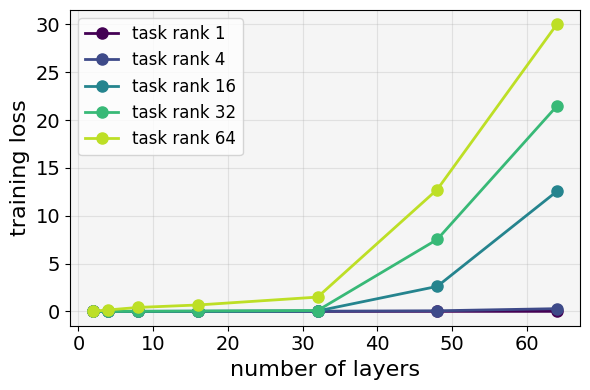

Saved: figure1_reproduced.png


In [3]:
# Create Figure 1 reproduction
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_facecolor("#f5f5f5")

colors = plt.cm.viridis(np.linspace(0, 0.9, len(ranks)))
markers = ["o", "s", "^", "D", "v"]

for i, rank in enumerate(ranks):
    ax.errorbar(
        depths,
        loss_means[rank],
        # yerr=loss_stds[rank],
        marker="o",
        color=colors[i],
        label=f"task rank {rank}",
        capsize=4,
        linewidth=2,
        markersize=8,
    )

ax.set_xlabel("number of layers", fontsize=16)
ax.set_ylabel("training loss", fontsize=16)
# ax.set_title("Deep Networks Struggle to Fit High-Rank Linear Functions", fontsize=16)
ax.legend(fontsize=12, title_fontsize=13)
ax.grid(True, alpha=0.3)
ax.tick_params(axis="both", which="major", labelsize=14)
# ax.set_yscale('log')

plt.tight_layout()
plt.savefig("figure1_reproduced.png", dpi=150, bbox_inches="tight")
plt.show()
print("Saved: figure1_reproduced.png")

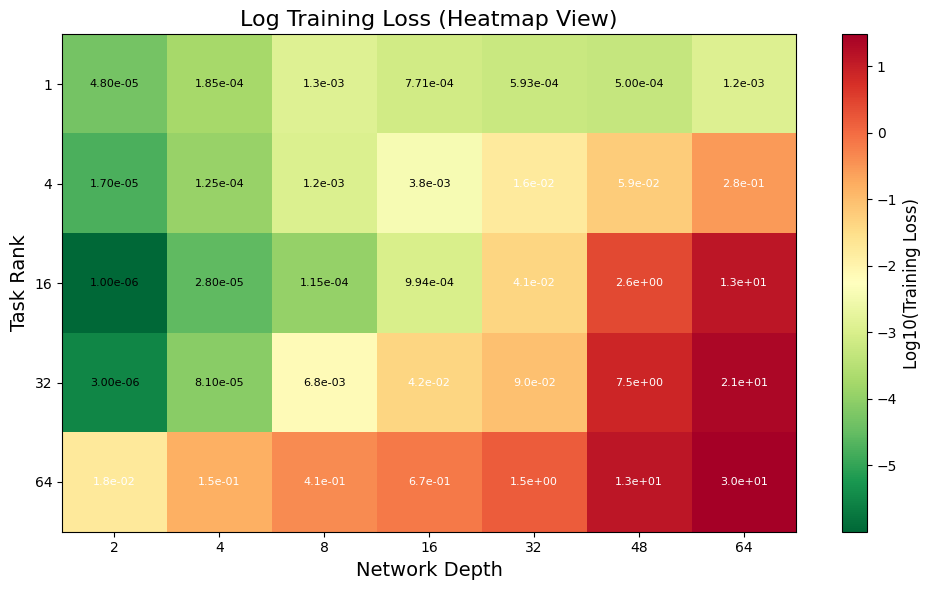

Saved: figure1_heatmap.png


In [4]:
# Alternative visualization: Heatmap
fig, ax = plt.subplots(figsize=(10, 6))

# Create matrix for heatmap
loss_matrix = np.array(
    [[np.mean(losses[str(r)][str(d)]) for d in depths] for r in ranks]
)

im = ax.imshow(np.log10(loss_matrix + 1e-10), aspect="auto", cmap="RdYlGn_r")
ax.set_xticks(range(len(depths)))
ax.set_xticklabels(depths)
ax.set_yticks(range(len(ranks)))
ax.set_yticklabels(ranks)
ax.set_xlabel("Network Depth", fontsize=14)
ax.set_ylabel("Task Rank", fontsize=14)
ax.set_title("Log Training Loss (Heatmap View)", fontsize=16)

cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Log10(Training Loss)", fontsize=12)

# Add text annotations
for i in range(len(ranks)):
    for j in range(len(depths)):
        val = loss_matrix[i, j]
        text = f"{val:.1e}" if val > 0.001 else f"{val:.2e}"
        ax.text(
            j,
            i,
            text,
            ha="center",
            va="center",
            fontsize=8,
            color="white" if np.log10(val + 1e-10) > -2 else "black",
        )

plt.tight_layout()
plt.savefig("figure1_heatmap.png", dpi=150, bbox_inches="tight")
plt.show()

print("Saved: figure1_heatmap.png")

In [5]:
# Print summary statistics
print("Summary: Training Loss by (Rank, Depth)")
print("=" * 60)
print(f"{'Rank':<8}", end="")
for d in depths:
    print(f"D={d:<6}", end="")
print()
print("-" * 60)

for rank in ranks:
    print(f"{rank:<8}", end="")
    for d in depths:
        mean_loss = np.mean(losses[str(rank)][str(d)])
        print(f"{mean_loss:<8.6f}", end="")
    print()

Summary: Training Loss by (Rank, Depth)
Rank    D=2     D=4     D=8     D=16    D=32    D=48    D=64    
------------------------------------------------------------
1       0.0000480.0001850.0013320.0007710.0005930.0005000.001220
4       0.0000170.0001250.0011510.0037750.0160990.0594490.282520
16      0.0000010.0000280.0001150.0009940.0413502.61085012.542616
32      0.0000030.0000810.0067700.0418090.0903167.51762421.455034
64      0.0181180.1513360.4132180.6686991.49279712.73527730.002804
